In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from src.PVC_points import PVC_points

In [2]:
# Génération des points :
def generer_fichier(n, nom="points"):
    with open(f"./data/{nom}.txt", "w") as file:
        E = rd.random(n)
        F = rd.random(n)
        for x, y in zip(E, F):
            file.write(f"({float(x)}, {float(y)})\n") 

In [3]:
# Constantes :
NUMBER_OF_POINTS = 10
NUMBER_OF_ESSAIES = 100

# Génération des points :
np.set_printoptions(precision=2)
for i in range(NUMBER_OF_ESSAIES):
    generer_fichier(NUMBER_OF_POINTS, f"points_{i + 1}")

In [4]:
cycles_ppp = []
cycles_opt_ppp = []
cycles_opt_prim = []
cycles_hds = []

for i in range(NUMBER_OF_ESSAIES):    
    GF = PVC_points()
    GF.charger_de_fichier(f"./data/points_{i + 1}.txt")
    points = GF.points_   
    c_ppp = GF.PPP(points[0])
    cycles_ppp.append(GF.longueur(c_ppp))

    c_opt_ppp = GF.OptPPP(points[0])
    cycles_opt_ppp.append(GF.longueur(c_opt_ppp))

    c_opt_prim = GF.OptPrim()
    cycles_opt_prim.append(GF.longueur(c_opt_prim))

    c_hds = GF.HDS()
    cycles_hds.append(GF.longueur(c_hds))

In [5]:
stats = np.vstack([np.array(cycles_ppp), np.array(cycles_opt_ppp), \
                   np.array(cycles_opt_prim), np.array(cycles_hds)]).T

np.set_printoptions(precision=2)
means = stats.mean(axis=0)
lp, lop, lpr, lhds = means
print(f"La longueur moyenne des cycles obtenus a partir de PPP : {lp:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de OptPPP : {lop:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de PVC_Prim : {lpr:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de HDS : {lhds:.3f}")

La longueur moyenne des cycles obtenus a partir de PPP : 3.606
La longueur moyenne des cycles obtenus a partir de OptPPP : 3.245
La longueur moyenne des cycles obtenus a partir de PVC_Prim : 3.518
La longueur moyenne des cycles obtenus a partir de HDS : 2.964


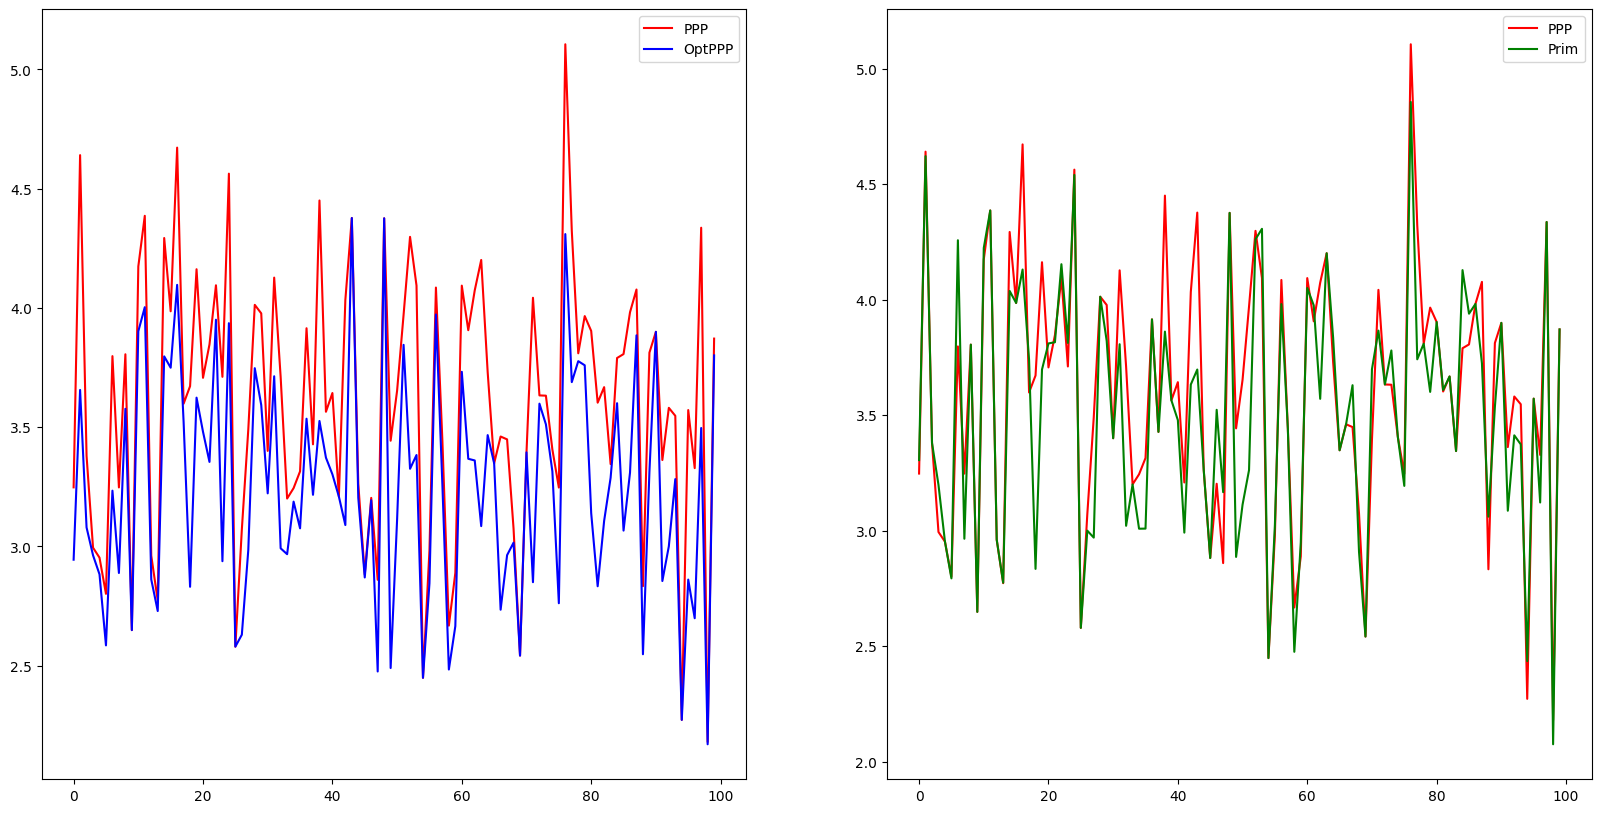

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.legend()
plt.subplot(122)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.legend()

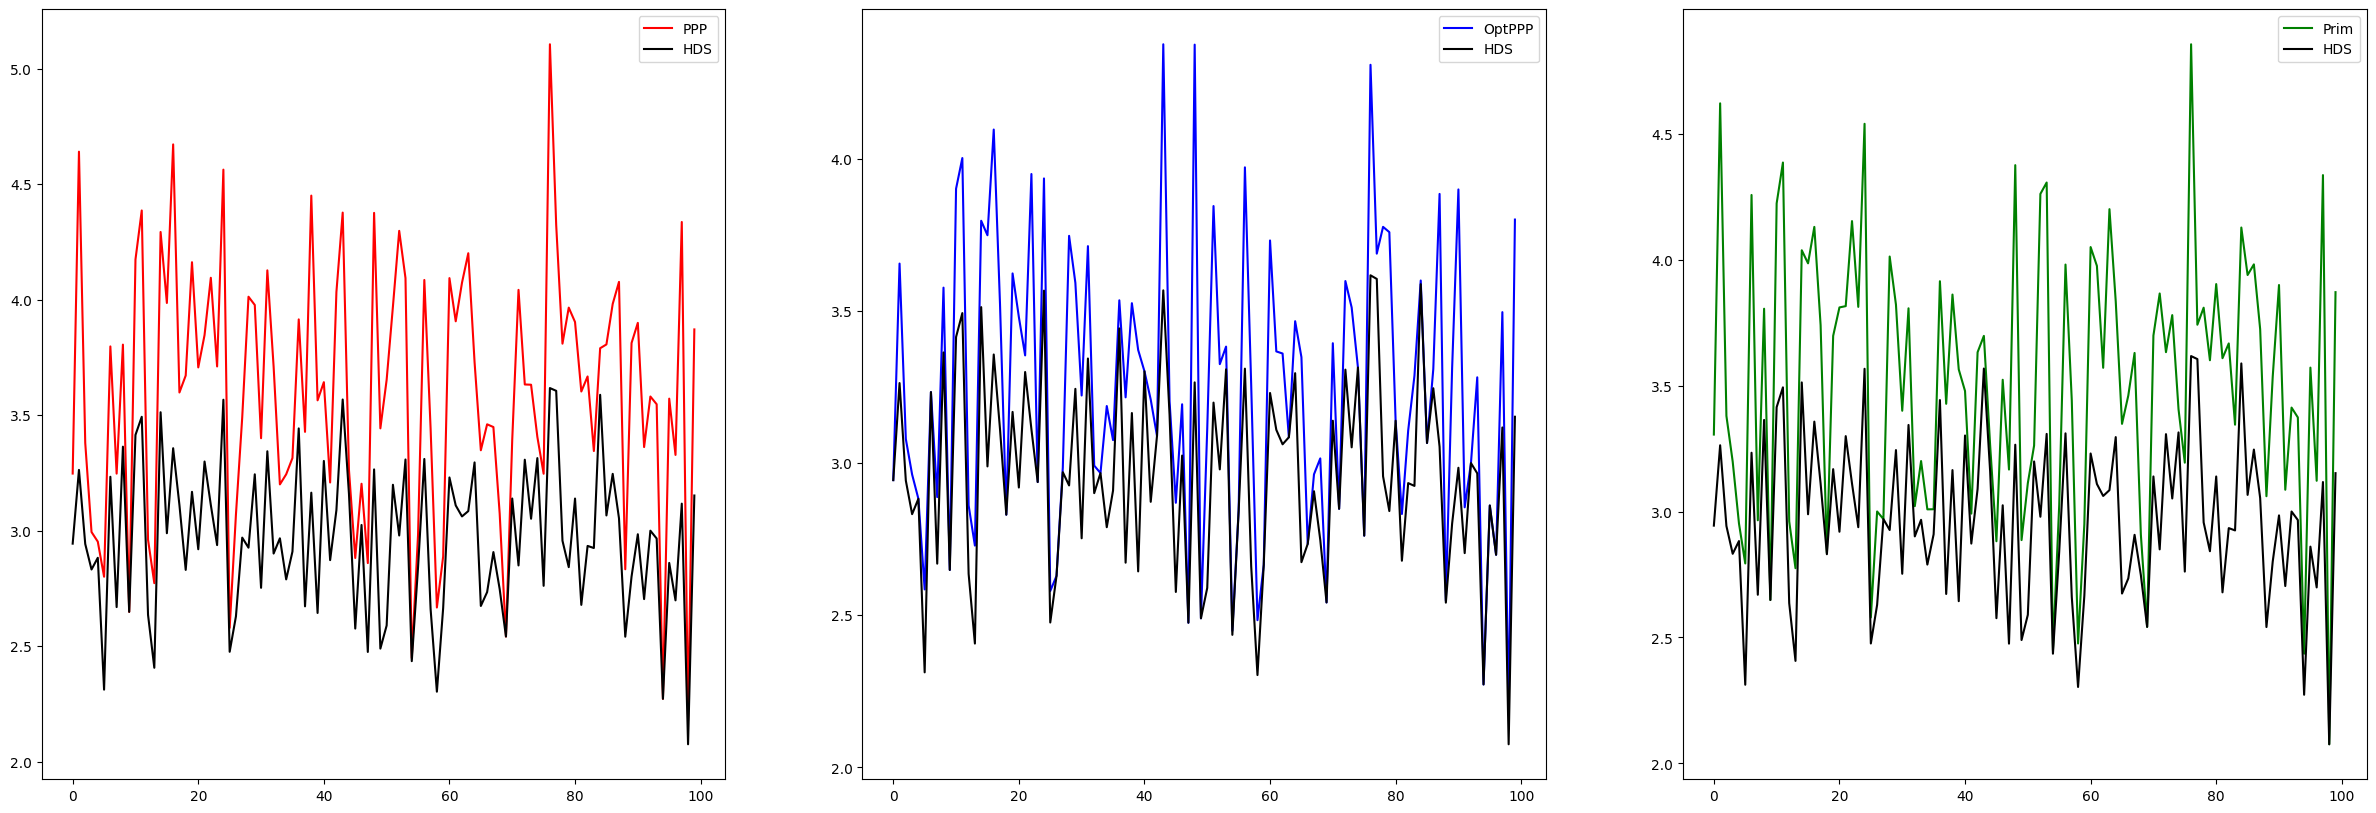

In [7]:
plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(132)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(133)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()

(array([ 1.,  3.,  5., 14., 12., 22., 14., 15.,  7.,  7.]),
 array([2.08, 2.23, 2.38, 2.54, 2.69, 2.85, 3.  , 3.15, 3.31, 3.46, 3.62]),
 <BarContainer object of 10 artists>)

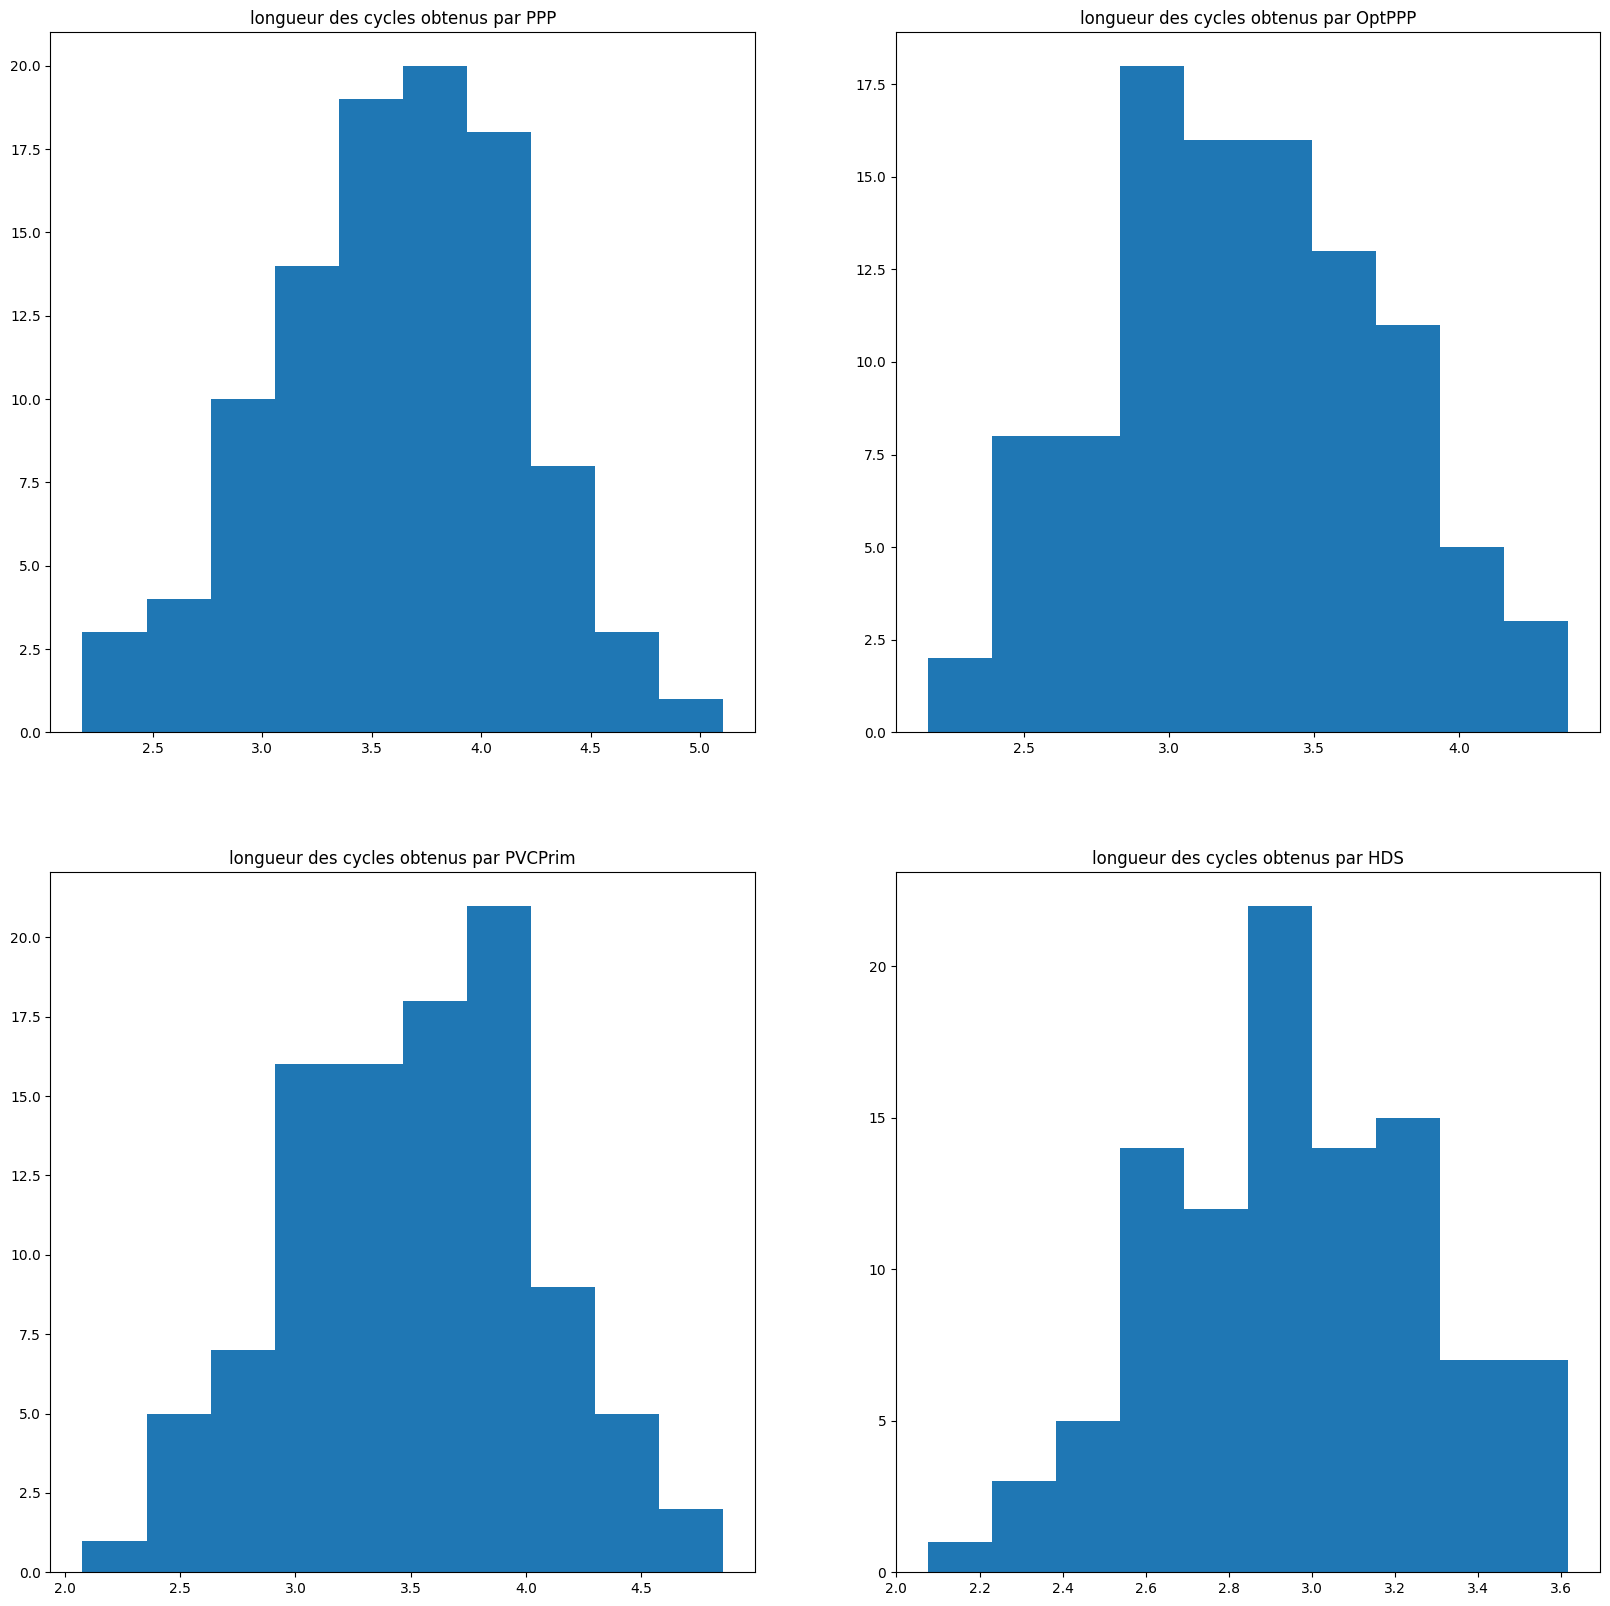

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title("longueur des cycles obtenus par PPP")
plt.hist(cycles_ppp)
plt.subplot(222)
plt.title("longueur des cycles obtenus par OptPPP")
plt.hist(cycles_opt_ppp)
plt.subplot(223)
plt.title("longueur des cycles obtenus par PVCPrim")
plt.hist(cycles_opt_prim)
plt.subplot(224)
plt.title("longueur des cycles obtenus par HDS")
plt.hist(cycles_hds)

In [9]:
improvement_ppp = (stats[:, 1] - stats[:, 0]) / stats[:, 0] * 100
print(f"{improvement_ppp.mean():.2f}%")

improvement_prim = (stats[:, 2] - stats[:, 1]) / stats[:, 1] * 100
print(f"{improvement_prim.mean():.2f}%")

-9.52%
8.74%
